<h2>Rzut pionowy z uwzględnieniem oporu

$$ma=-mg-kv $$
$$a=-g-\frac{k}{m}v$$
$$a=-g-\beta v$$
$$\frac{dv }{dt}=-g-\beta v$$
$$\left\{\begin{matrix}
\frac{dx}{dt}=v\\ 
\frac{dv}{dt}=-g-\beta v
\end{matrix}\right.$$
         $$\frac{dS(x,v)}{dt}=\begin{bmatrix}
\frac{dx}{dt}\\ 
\frac{dv}{dt}
\end{bmatrix}=\begin{bmatrix}
v\\ 
-g-\beta v
\end{bmatrix}$$

In [3]:
import warnings
warnings.filterwarnings('ignore')

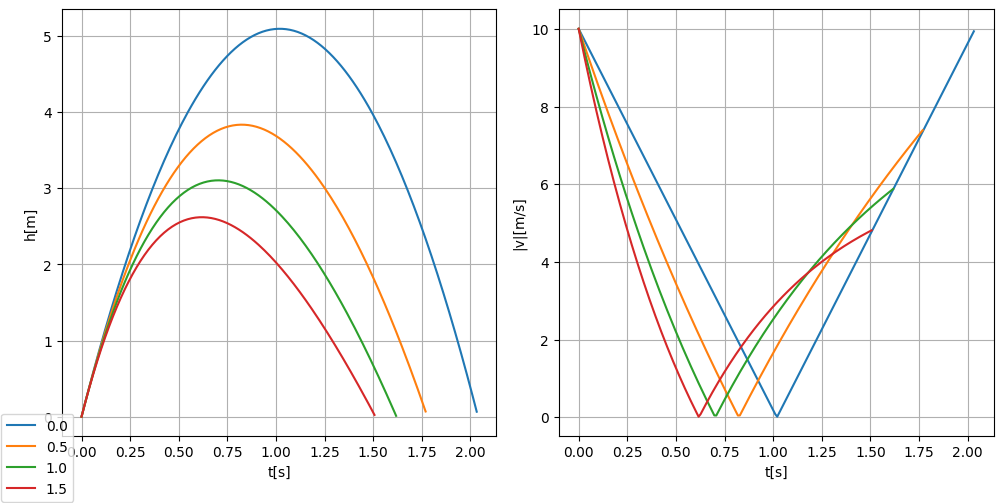

In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def dSdt(t,S):
    x,v,g,k=S
    return [v,-g-k*v,0,0]

def rzut(g,k):
    t=np.linspace(0,10.1,1000)
    x0=0
    v0=10
    S0=[0,10,g,k]
    sol=odeint(dSdt,y0=S0,t=t,tfirst=True)
    xsol=sol.transpose()[0]
    vsol=sol.transpose()[1]
    x=xsol[xsol>=0]
    v=vsol[xsol>=0]
    t=t[:len(x)]
    return [t,x,v]

line_labels=[]
kl=np.arange(0,2,0.5)
fig,[ax1,ax2]=plt.subplots(1,2)
fig.set_size_inches(10,5)

ax1.grid()
ax2.grid()
for k in kl:
    t,x,v=rzut(9.81,k)
    ax1.plot(t,x)
    ax1.set_xlabel('t[s]')
    ax1.set_ylabel('h[m]')
    ax2.plot(t,np.abs(v))
    ax2.set_xlabel('t[s]')
    ax2.set_ylabel('|v|[m/s]')
    line_labels.append(k)
# Create the legend
fig.legend(ax1.get_lines(),   # The lines objects
           labels=line_labels,   # The labels for each line
          loc='lower left',   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           
           )

fig.tight_layout()

In [103]:
import sympy as sp
t,g,b,f,vp=sp.symbols('t,g,b,f,v_p',real=True)
f = sp.Function("v")(t)
diff_eq=sp.Eq(f.diff(t),-g-b*f)
sol =sp.dsolve(diff_eq,f)
sol.simplify()

Eq(v(t), C1*exp(-b*t) - g/b)

In [104]:
exp = sol.rhs
_,C1,_,_=tuple(exp.free_symbols) #tuple unpacking
ics = {f.subs(t,0):vp} #initial conditions v(0)=25
ivp = sp.dsolve(diff_eq,ics=ics)
ivp

Eq(v(t), -g/b + (b*v_p + g)*exp(-b*t)/b)

In [107]:
eq4=sp.Eq(ivp.rhs,0)
eq4
2*sp.solve(eq4,t)[0]


2*log((b*v_p + g)/g)/b

In [91]:
eq=ivp.rhs
eq2=sp.integrate(eq,t,conds='none')
eq3=sp.Eq(eq2,0)
eq3

Eq(-g*t/b + (-b*v_p - g)*exp(-b*t)/b**2, 0)

In [106]:
time = sp.solve(eq3,t)
time[0]

LambertW((-b*v_p - g)/g)/b

In [59]:
sp.limit(ivp.rhs,b,0)

-g*t + v_p

In [72]:
sp.limit(eq2,b,0)

-oo*sign(g)